Este Proyecto esta basado en el Libro: Aprende Machine Learning. Donde practicaremos lo aprendido a regresión logísticas.

Lo que haremos es clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Mac o Linux.

Valores de las etiquetas:
- 0: Windows
- 1: Mac
- 2: Linux

Cargamos nuestras librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

Cargamos nuestro dataset

In [3]:
df = pd.read_csv('usuarios_win_mac_lin.csv')
df.head(3)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2


Vemos cuantas filas y columnas contiene nuestro dataset

In [4]:
df.shape

(170, 5)

Vemos el nombre de nuestras columnas, la cantidad de datos no nulos y el tipo de datos de cada una de ellas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


Realizamos una pequeña estadistica descriptiva de las columnas numericas

In [6]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Revisamos si hay datos nulos

In [7]:
df.isnull().sum()

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64

Revisamos cuantos datos unicos hay por columnas

In [8]:
df.nunique()

duracion    87
paginas      8
acciones    26
valor       43
clase        3
dtype: int64

Por utlimo agrupamos por clase y vemos cuantos datos hay en cada una de ellas

In [9]:
df.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

Visualizamos los datos

Graficaremos un histograma para cada una de las columnas, excepto la columna a predecir. Para observar entre que valores se comprenden sus maximos y minimos y en que intervalors concentran la mayor densidad de registros.

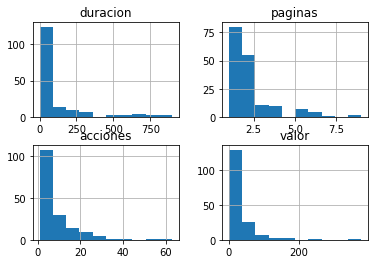

In [10]:
df.drop(['clase'],1).hist()
plt.show()

También podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


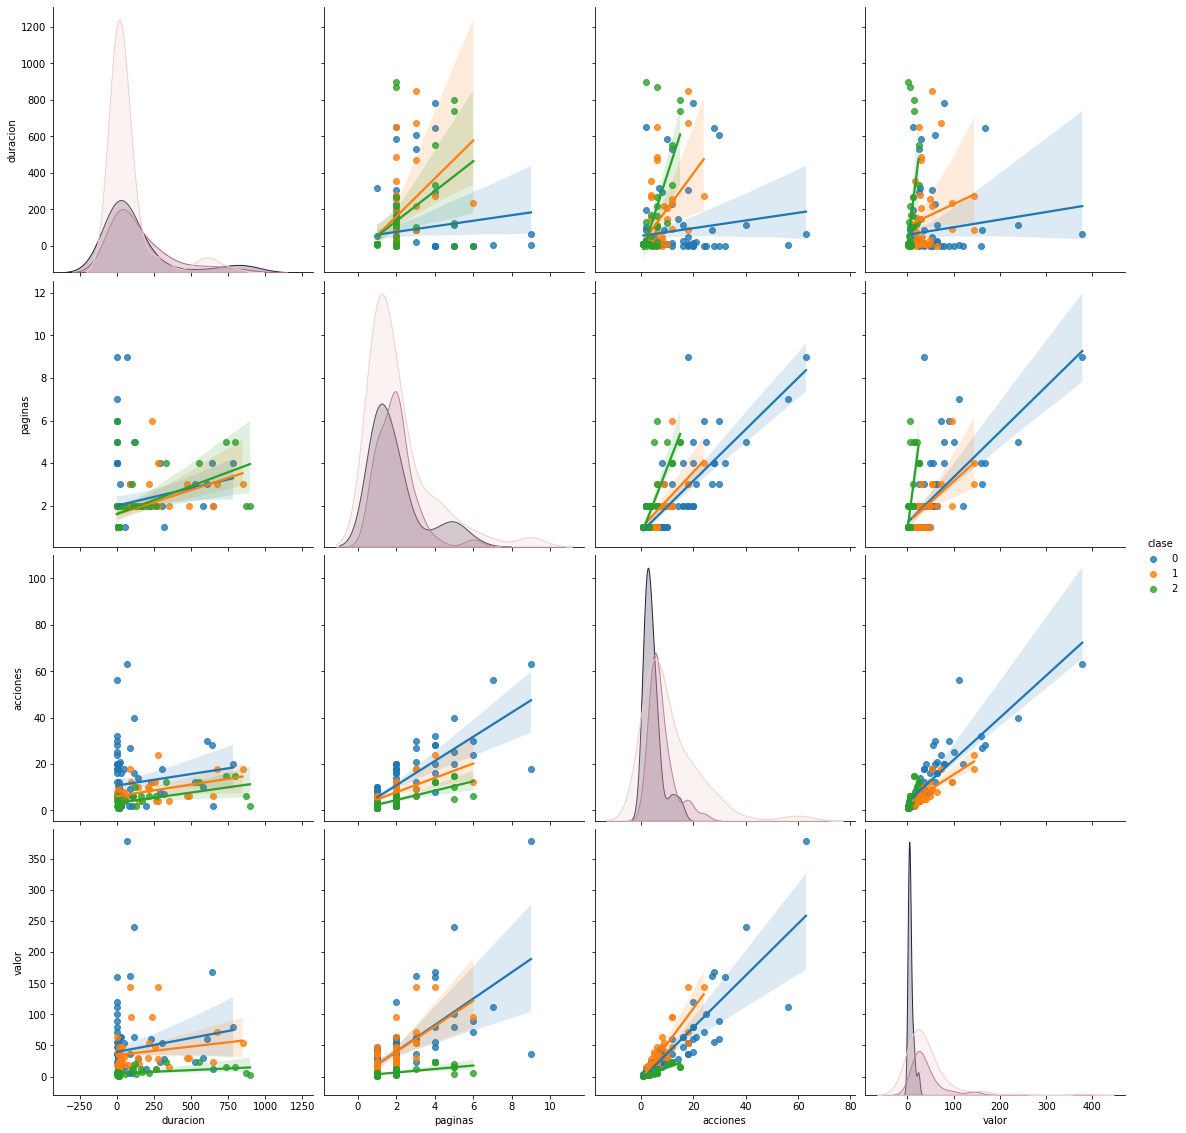

In [11]:
sns.pairplot(df.dropna(), hue='clase', size=4, vars=['duracion','paginas','acciones','valor'], kind = 'reg' )

Creamos el modelo

Cargamos todas las columnas excepto clase en 'X' y en 'y' cargamos la variable a predecir 

In [12]:
X = np.array(df.drop(['clase'],1))
y = np.array(df['clase'])
X.shape

(170, 4)

Creamos nuestro modelo y hacemos que se ajuste a nuestro conjunto de entradas X y salida 'y'.

In [13]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Una vez compilado el modelo le hacemos clasificar todo nuestro conjunto de entradas X utilizando el metodo predict(X) y revisamos algunas de sus salidas

In [14]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Confirmamos que tan bueno fue nuestro modelo utilizando model.score() que nos devuelve la presicion de la medai de las predcicciones. 78% en nuestro caso.

In [15]:
model.score(X,y)

0.7823529411764706

Validación del modelo

Es una buena practica subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo. Para ello, dividiremos nuestro datos de entrada en forma aleatoria utilizando 80% de registros de entrenamiento y 20% para testear

In [16]:
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

Volvemos a compilar nuestro modelo de regresion logistica, pero esta vez solo co 80% de los datos de entrada y calculamos el nuevo scoring 

In [18]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = '%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
print(msg)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression: 0.712637 (0.146407)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Ahora hacemos las predicciones (clasificacion) utilizando nuestro test set, es decir el subconjunto que habiamos apartado. En este caso vemos que los aciertos ffueron del 85%

In [19]:
predictions = model.predict(X_validation)
print(accuracy_score(y_validation,predictions))

0.8529411764705882


Reporte de resultados

Vemos la matriz de confusion donde nos muestra cuantos resultados equivocados tuvo de cada clase (los que no estan en la diagonal). Por ejmplo predijo 3 usuarios que eran Mac como usuarios de Windoes y predijo 2 usuarios Linuz que realmente eran de Windows

In [20]:
confusion_matrix(y_validation, predictions)

array([[16,  0,  2],
       [ 3,  3,  0],
       [ 0,  0, 10]])

Tambien podemos ver el reporte de clasificacion con nuestro conjunto de Test. Podemos ver cuatos se registros se utilizaron como soporte, la precision que se acertaron cada una de las clases. La valoracion que aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precision y el recall. 

In [22]:
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



Clasificacion de nuevos registros

Vamos a inventar los datos de entrada de navegacion de un usuario ficticio que tiene los siguientes valores:
- Tiempo Duracion: 10
- Paginas visitadas: 3
- Acciones al navegar: 5
- Valoracion: 9

In [23]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.